In [ ]:
!pip install --upgrade tensorflow


In [ ]:
from google.colab import drive

# Mount Google Drive to access your dataset
drive.mount('/content/drive')

# Define dataset path
dataset_path = '/content/drive/MyDrive/blood afc'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from tensorflow.keras.applications import MobileNetV2

In [ ]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 15  # Number of epochs for training

In [ ]:
dataset_path = '/content/drive/MyDrive/blood afc'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,                 # Rescale pixel values between 0 and 1
    rotation_range=40,              # Randomly rotate images
    width_shift_range=0.2,          # Randomly shift images horizontally
    height_shift_range=0.2,         # Randomly shift images vertically
    shear_range=0.2,                # Random shear transformations
    zoom_range=0.2,                 # Random zoom
    horizontal_flip=True,           # Randomly flip images horizontally
    validation_split=0.2            # 20% of data for validation
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    dataset_path,                   # Path to the dataset
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

Found 272 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    dataset_path,                   # Path to the dataset
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 67 images belonging to 2 classes.


In [ ]:
def create_transfer_model():
    # Define the input layer
    inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))

    # Load the MobileNetV2 model, excluding the top layer
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=inputs)

    # Freeze the base model layers
    base_model.trainable = False

    x = base_model(inputs)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Single output for binary classification
    outputs = Dense(1, activation='sigmoid')(x)

    # Create the model
    model = Model(inputs, outputs)  # Create the Model instance

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Create the model
    model = create_transfer_model()

# Assuming you have training data and you train the model
# model.fit(X_train, y_train, ...)



    return model

# Create the model
    model = create_transfer_model()

# Print the model summary to verify changes
    model.summary()

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.001
)

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

tensorboard = TensorBoard(log_dir='logs', histogram_freq=1)


In [ ]:
callbacks = [early_stopping, reduce_lr, checkpoint, tensorboard]

In [ ]:
try:
    history = model.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=validation_generator,
        callbacks=callbacks,  # Add the callbacks here
        verbose=1
    )
except Exception as e:
    print(f"Error during model training: {e}")

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8731 - loss: 0.3137
Epoch 1: val_accuracy improved from -inf to 0.77612, saving model to best_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.8715 - loss: 0.3168 - val_accuracy: 0.7761 - val_loss: 0.5139 - learning_rate: 0.0010
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8785 - loss: 0.3052
Epoch 2: val_accuracy did not improve from 0.77612
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.8756 - loss: 0.3101 - val_accuracy: 0.7612 - val_loss: 0.4742 - learning_rate: 0.0010
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7886 - loss: 0.3670
Epoch 3: val_accuracy did not improve from 0.77612
9/9 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.7917 - loss: 0.3660 - val_accuracy: 0.7612 - val_loss: 0.5000 - learning_rate: 0.0010
Epoch 4/15


KeyboardInterrupt: 

In [ ]:
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}')

NameError: name 'model' is not defined

In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
!pip install --upgrade tensorflow

# %%
from google.colab import drive

# Mount Google Drive to access your dataset
drive.mount('/content/drive')

# Define dataset path
dataset_path = '/content/drive/MyDrive/blood afc'

# %%
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from tensorflow.keras.applications import MobileNetV2
# %%
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 15  # Number of epochs for training
# %%
dataset_path = '/content/drive/MyDrive/blood afc'
# %%
train_datagen = ImageDataGenerator(
    rescale=1./255,                 # Rescale pixel values between 0 and 1
    rotation_range=40,              # Randomly rotate images
    width_shift_range=0.2,          # Randomly shift images horizontally
    height_shift_range=0.2,         # Randomly shift images vertically
    shear_range=0.2,                # Random shear transformations
    zoom_range=0.2,                 # Random zoom
    horizontal_flip=True,           # Randomly flip images horizontally
    validation_split=0.2            # 20% of data for validation
)
# %%
train_generator = train_datagen.flow_from_directory(
    dataset_path,                   # Path to the dataset
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)
# %%
validation_generator = train_datagen.flow_from_directory(
    dataset_path,                   # Path to the dataset
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# %%
def create_transfer_model():
    # Define the input layer
    inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))

    # Load the MobileNetV2 model, excluding the top layer
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=inputs)

    # Freeze the base model layers
    base_model.trainable = False

    x = base_model(inputs)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Single output for binary classification
    outputs = Dense(1, activation='sigmoid')(x)

    # Create the model
    model = Model(inputs, outputs)  # Create the Model instance

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create the model in the global scope
model = create_transfer_model()

# Print the model summary to verify changes
model.summary()
# %%
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.001
)

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

tensorboard = TensorBoard(log_dir='logs', histogram_freq=1)

# %%
callbacks = [early_stopping, reduce_lr, checkpoint, tensorboard]
# %%
try:
    history = model.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=validation_generator,
        callbacks=callbacks,  # Add the callbacks here
        verbose=1
    )
except Exception as e:
    print(f"Error during model training: {e}")
# %%
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 272 images belonging to 2 classes.
Found 67 images belonging to 2 classes.


<ipython-input-40-b96bc88c110b>:62: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=inputs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6201 - loss: 0.7696
Epoch 1: val_accuracy improved from -inf to 0.67164, saving model to best_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.6206 - loss: 0.7710 - val_accuracy: 0.6716 - val_loss: 0.7042 - learning_rate: 0.0010
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6734 - loss: 0.5748
Epoch 2: val_accuracy improved from 0.67164 to 0.79104, saving model to best_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.6770 - loss: 0.5705 - val_accuracy: 0.7910 - val_loss: 0.5036 - learning_rate: 0.0010
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7777 - loss: 0.4292
Epoch 3: val_accuracy did not improve from 0.79104
9/9 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7782 - loss: 0.4286 - val_accuracy: 0.7761 - val_loss: 0.5146 - learning_rate: 0.0010
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7968 - loss: 0.3867
Epoch 4: val_accuracy improved from 0.7

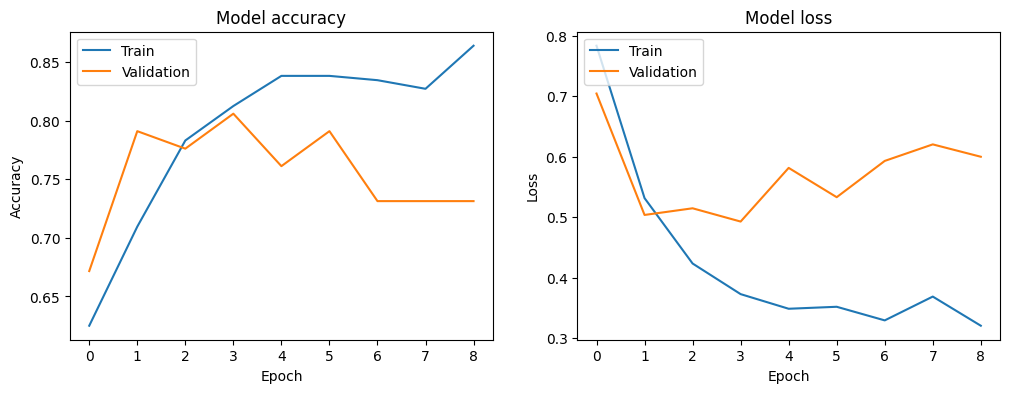

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
from tensorflow.keras.models import load_model

# Load the best saved model
best_model = load_model('best_model.keras')

# Assuming you have a function to preprocess the frames from your video
# processed_frame = preprocess_frame(frame)

# Predict on the new frame
# prediction = best_model.predict(processed_frame)
# print("Predicted class:", "Blood" if prediction[0][0] > 0.5 else "Non-Blood")


3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step


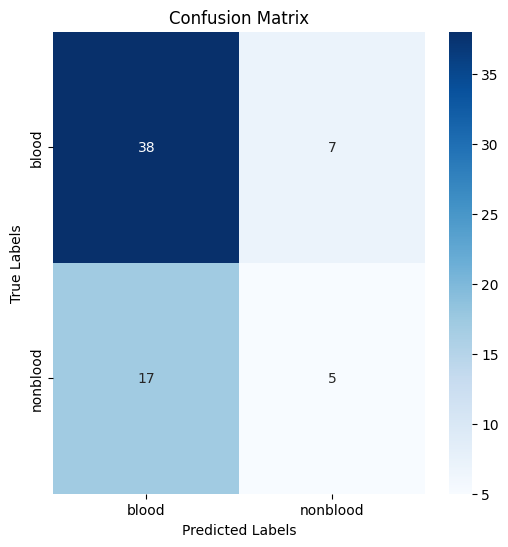

Classification Report:
               precision    recall  f1-score   support

       blood       0.69      0.84      0.76        45
    nonblood       0.42      0.23      0.29        22

    accuracy                           0.64        67
   macro avg       0.55      0.54      0.53        67
weighted avg       0.60      0.64      0.61        67



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on the validation set
validation_generator.reset()  # Reset the generator for consistency
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)

# Convert predictions to binary labels (0 or 1)
predicted_classes = np.where(predictions > 0.5, 1, 0).flatten()

# Get true labels from the generator
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Display classification report for additional metrics
print("Classification Report:\n", classification_report(true_classes, predicted_classes, target_names=class_labels))


**profanity**


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array

# Load the best saved model
best_model = load_model('best_model.keras')

# Function to preprocess frames for prediction
def preprocess_frame(frame, target_size):
    frame = cv2.resize(frame, target_size)  # Resize to target size
    frame = frame / 255.0  # Normalize pixel values to [0, 1]
    frame = img_to_array(frame)  # Convert to array
    frame = np.expand_dims(frame, axis=0)  # Add batch dimension
    return frame

# Function to extract frames and timestamps with blood detection
def analyze_video(video_path, model, target_size=(224, 224), threshold=0.5):
    video_capture = cv2.VideoCapture(video_path)
    fps = video_capture.get(cv2.CAP_PROP_FPS)  # Frames per second
    frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

    results = []

    for frame_idx in range(frame_count):
        ret, frame = video_capture.read()

        if not ret:
            break

        # Preprocess the frame for prediction
        processed_frame = preprocess_frame(frame, target_size)
        prediction = model.predict(processed_frame)[0][0]

        if prediction > threshold:  # Blood detected
            timestamp = frame_idx / fps  # Calculate timestamp in seconds
            results.append((timestamp, frame))

    video_capture.release()
    return results

# Function to save frames with timestamps
def save_detected_frames(frames_with_timestamps, output_dir='detected_frames'):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for idx, (timestamp, frame) in enumerate(frames_with_timestamps):
        output_path = os.path.join(output_dir, f"frame_{idx}_time_{timestamp:.2f}.jpg")
        cv2.imwrite(output_path, frame)

# Example  usage
video_file_path = '/content/vid2.mp4'  # Replace with your video file path
frames_with_timestamps = analyze_video(video_file_path, best_model)

# Save the frames with timestamps
save_detected_frames(frames_with_timestamps)

# Print timestamps for frames where blood was detected
for timestamp, _ in frames_with_timestamps:
    print(f"Blood detected at timestamp: {timestamp:.2f} seconds")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━